Лабораторная работа №1, Научное Программирование

Добрый день! За основу я взяла датасет от Сбербанка:
https://www.kaggle.com/competitions/sberbank-russian-housing-market  
Сам датасет не получилось скачать с кэггла (что-то с аккаунтом), поэтому брала отсюда:  
https://github.com/AdmiralWen/Sberbank-Russian-Housing-Market  
Датасет представляет из себя набор данных об объектах недвижимости (как я поняла, имеется в виду жилая недвижимость).
Ниже скопированы описания параметров:

In [1]:
# price_doc: sale price (this is the target variable)
# id: transaction id
# timestamp: date of transaction
# full_sq: total area in square meters, including loggias, balconies and other non-residential areas
# life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
# floor: for apartments, floor of the building
# max_floor: number of floors in the building
# material: wall material
# build_year: year built
# num_room: number of living rooms
# kitch_sq: kitchen area
# state: apartment condition
# product_type: owner-occupier purchase or investment
# sub_area: name of the district

# The dataset also includes a collection of features about each property's surrounding neighbourhood,
# and some features that are constant across each sub area (known as a Raion).
# Most of the feature names are self explanatory, with the following notes. See below for a complete list.

# full_all: subarea population
# male_f, female_f: subarea population by gender
# young_*: population younger than working age
# work_*: working-age population
# ekder_*: retirement-age population
# n_m_{all|male|female}: population between n and m years old
# build_count_*: buildings in the subarea by construction type or year
# x_count_500: the number of x within 500m of the property
# x_part_500: the share of x within 500m of the property
# _sqm_: square meters
# cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
# trc_: shopping malls
# prom_: industrial zones
# green_: green zones
# metro_: subway
# _avto_: distances by car
# mkad_: Moscow Circle Auto Road
# ttk_: Third Transport Ring
# sadovoe_: Garden Ring
# bulvar_ring_: Boulevard Ring
# kremlin_: City center
# zd_vokzaly_: Train station
# oil_chemistry_: Dirty industry
# ts_: Power plant

Импортируем библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Импортируем датасет:

In [3]:
train = pd.read_csv('sber.csv')
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,6905,2013-03-30,88,79.0,4.0,NaN,NaN,NaN,NaN,NaN,...,14.0,3.0,0.0,11.0,11.0,0.0,1.0,56.0,5.0,13583544.0
6903,6906,2013-03-30,76,32.0,9.0,NaN,NaN,NaN,NaN,NaN,...,33.0,6.0,1.0,17.0,34.0,1.0,13.0,66.0,13.0,11000000.0
6904,6907,2013-03-30,106,54.0,9.0,NaN,NaN,NaN,NaN,NaN,...,13.0,4.0,1.0,5.0,8.0,0.0,1.0,47.0,6.0,8919000.0
6905,6908,2013-04-01,79,NaN,17.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,6453216.0


Визуально видно, что в таблице много пропусков. Как видно, есть целые столбцы без информации:

In [4]:
train['num_room'].isnull().sum()

6907

Уберем те столбцы, которые содержат менее половины значений:

In [5]:
for column in train.columns:
    if train[column].isnull().sum()>0.5*len(column):
        train.drop(column, inplace=True, axis=1)
train

,id,timestamp,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,...,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0
1,2,2011-08-23,34,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,...,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0
2,3,2011-08-27,43,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,...,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0
3,4,2011-09-01,89,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,...,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0
4,5,2011-09-05,77,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,...,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,6905,2013-03-30,88,OwnerOccupier,Severnoe Tushino,9.249237e+06,156377,0.374068,0.000000,10190,...,14.0,3.0,0.0,11.0,11.0,0.0,1.0,56.0,5.0,13583544.0
6903,6906,2013-03-30,76,Investment,Nagatino-Sadovniki,7.750778e+06,76284,0.094681,0.313925,4935,...,33.0,6.0,1.0,17.0,34.0,1.0,13.0,66.0,13.0,11000000.0
6904,6907,2013-03-30,106,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,...,13.0,4.0,1.0,5.0,8.0,0.0,1.0,47.0,6.0,8919000.0
6905,6908,2013-04-01,79,OwnerOccupier,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,...,1.0,0.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,6453216.0


Посмотрим на параметры и их тип:

In [6]:
for i in train.columns:
    print (i, train[i].dtypes)

id int64
timestamp object
full_sq int64
product_type object
sub_area object
area_m float64
raion_popul int64
green_zone_part float64
indust_part float64
children_preschool int64
preschool_education_centers_raion int64
children_school int64
school_education_centers_raion int64
school_education_centers_top_20_raion int64
healthcare_centers_raion int64
university_top_20_raion int64
sport_objects_raion int64
additional_education_raion int64
culture_objects_top_25 object
culture_objects_top_25_raion int64
shopping_centers_raion int64
office_raion int64
thermal_power_plant_raion object
incineration_raion object
oil_chemistry_raion object
radiation_raion object
railroad_terminal_raion object
big_market_raion object
nuclear_reactor_raion object
detention_facility_raion object
full_all int64
male_f int64
female_f int64
young_all int64
young_male int64
young_female int64
work_all int64
work_male int64
work_female int64
ekder_all int64
ekder_male int64
ekder_female int64
0_6_all int64
0_6_male in

In [7]:
# пример того, какие значения могут принимать параметры
Counter(train['nuclear_reactor_raion'])

Counter({'no': 6705, 'yes': 202})

Т.к. датасет очень большой, ограничим объем данных 10 параметрами, которые из списка мне субъективно кажутся наиболее значимыми в определении цены. Также для простоты будем брать только количественные переменные, кроме названия района.

In [8]:
train = train[['id','sub_area','full_sq','green_zone_part','indust_part','children_preschool','children_school',\
               'metro_min_avto',\
               'metro_min_walk','public_transport_station_min_walk','detention_facility_km',\
              'cafe_count_500','price_doc']]

Гипотеза состоит в том, что следующие параметры будут иметь положительную корреляцию с параметром цены:  
  
'full_sq' - метраж площади объекта недвижимости  
'green_zone_part' - объем зеленой зоны в районе  
'indust_part' - объем индустриальной зоны в районе  
'children_preschool' - количество объектов дошкольного образования в районе  
'children_school' - количество школ в районе  
'cafe_count_500' - количество кафе в радиусе 500 метров  
  
Следующие параметры предположительно будут иметь отрицательную корреляцию с параметром цены:  
  
'metro_min_avto' - время в пути до метро на автомобиле  
'metro_min_walk' - время в пути до метро пешком  
'public_transport_station_min_walk' - время пешком до остановки общ транспорта  
'detention_facility_km' - расстояние до следственного изолятора  

In [9]:
train

,id,sub_area,full_sq,green_zone_part,indust_part,children_preschool,children_school,metro_min_avto,metro_min_walk,public_transport_station_min_walk,detention_facility_km,cafe_count_500,price_doc
0,1,Bibirevo,43,0.189727,0.000070,9576,10309,2.590241,13.575119,3.299822,4.248036,0.0,5850000.0
1,2,Nagatinskij Zaton,34,0.372602,0.049637,6880,7759,0.936700,7.620630,0.783160,12.649879,5.0,6000000.0
2,3,Tekstil'shhiki,43,0.112560,0.118537,5879,6207,2.120999,17.351515,3.945073,7.682303,3.0,5700000.0
3,4,Mitino,89,0.194703,0.069753,13087,13670,1.489049,11.565624,1.579164,8.789894,2.0,13100000.0
4,5,Basmannoe,77,0.015234,0.037316,5706,6748,1.257186,8.266305,0.857764,3.779781,48.0,16331452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,6905,Severnoe Tushino,88,0.374068,0.000000,10190,11319,1.998977,16.486966,2.109024,11.176436,3.0,13583544.0
6903,6906,Nagatino-Sadovniki,76,0.094681,0.313925,4935,4625,1.879822,14.991695,3.520742,15.375459,2.0,11000000.0
6904,6907,Mitino,106,0.194703,0.069753,13087,13670,1.097668,7.179609,2.325418,5.900068,2.0,8919000.0
6905,6908,Nekrasovka,79,0.055644,0.243205,1706,1564,0.913144,4.431607,1.914802,12.078101,0.0,6453216.0


Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 111,111,112 рублей
Средняя цена за объект недвижимости составляла 6,332,322 рублей, медианная цена - 5,650,000 рублей


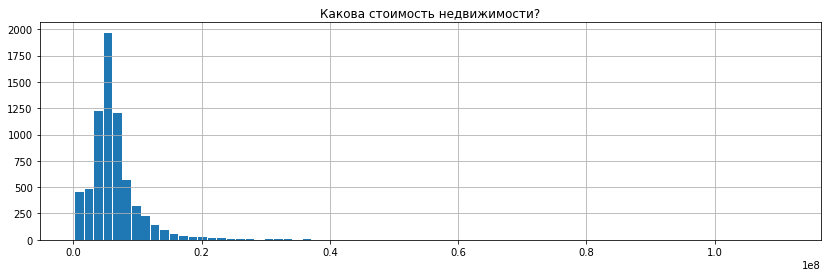

In [10]:
# посмотрим на целевую переменную:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

Самый ближайший объект находится в 0.09 минутах от метро, самый дальний - в 600.32 минутах.


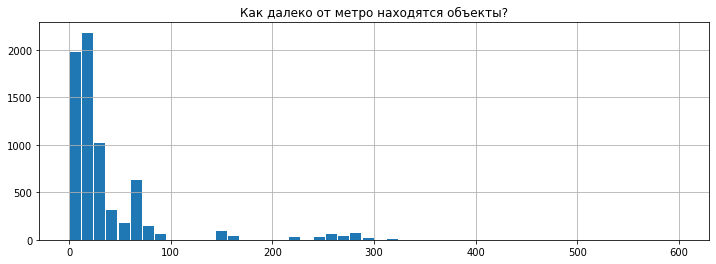

In [11]:
# посмотрим на распределение жилья в зависимости от количества минут пешком до метро
print('Самый ближайший объект находится в {} минутах от метро, самый дальний - в {} минутах.'.format(
    round(train.metro_min_walk.min(),2), round(train.metro_min_walk.max(),2)))
train.metro_min_walk.hist(bins=50, rwidth=.9, figsize=(12,4))
plt.title('Как далеко от метро находятся объекты?')
plt.show()

Большинство жилищ в 0-30 минутах от метро, видимо, это связано с тем, что в Москве много станций.

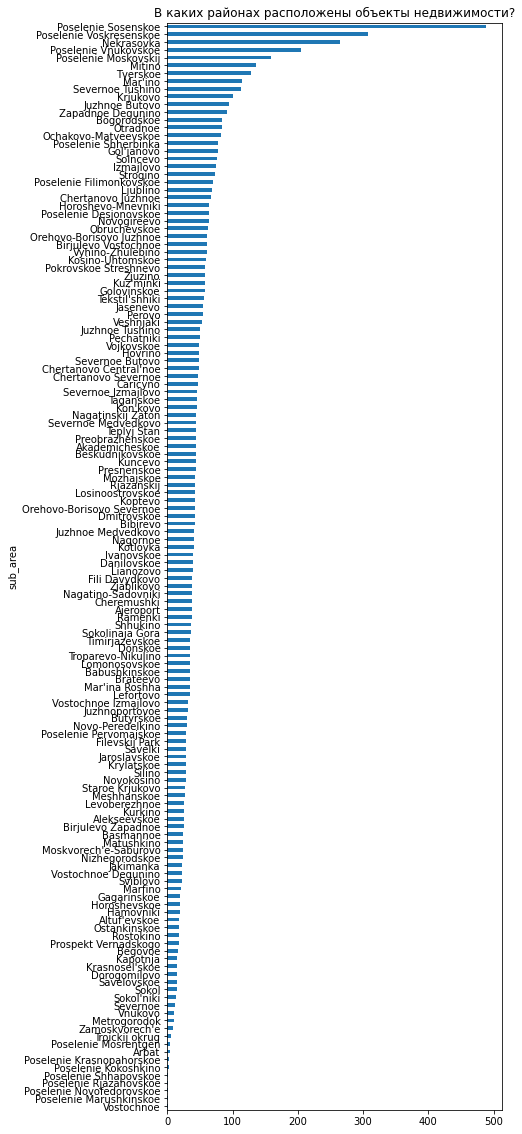

In [12]:
# посмотрим, в каких районах расположены объекты
train.groupby('sub_area').id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,20))
plt.title('В каких районах расположены объекты недвижимости?')
plt.show()

Самая большая площадь объекта недвижимости составляет 5,326 кв.м., самая маленькая - 5 кв.м.
Средняя площадь объекта недвижимости составляет 54 кв.м., медианная - 45 кв.м.


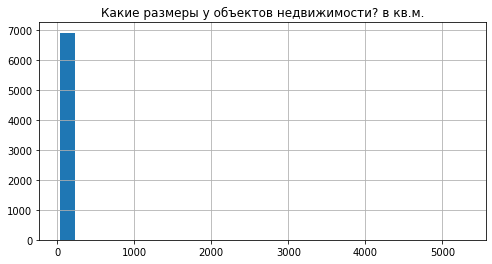

In [13]:
# Насколько большие продаваемые объекты по площади?
print('Самая большая площадь объекта недвижимости составляет {:,.0f} кв.м., самая маленькая - {:,.0f} кв.м.'.format(
    train.full_sq.max(), train.full_sq.min()))
print('Средняя площадь объекта недвижимости составляет {:,.0f} кв.м., медианная - {:,.0f} кв.м.'.format(
    train.full_sq.mean(), train.full_sq.median()))

train.full_sq.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Какие размеры у объектов недвижимости? в кв.м.')
plt.show()

Мы видим, что у нас большие выбросы что в цене, что в жилой площади, поэтому предлагается выкинуть что-то очень большое.

<AxesSubplot:xlabel='full_sq'>

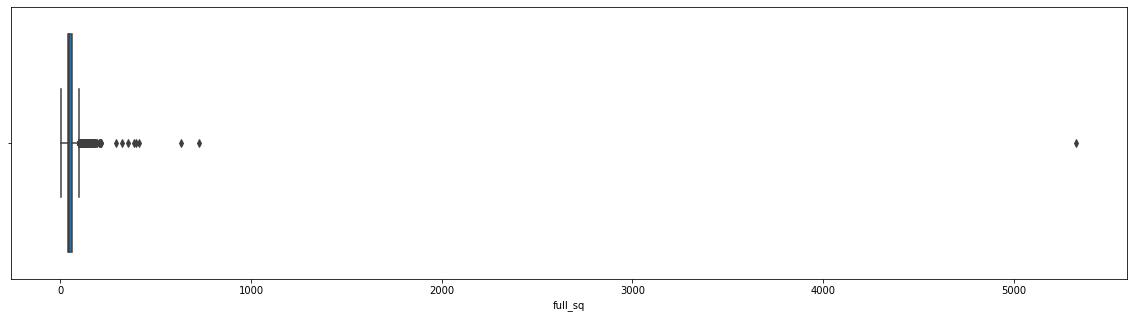

In [14]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["full_sq"])

Возьмем объекты до 1000 кв.м.

In [15]:
train.shape

(6907, 13)

In [16]:
train = train[train['full_sq'] < 1000]
train.shape

(6906, 13)

<AxesSubplot:xlabel='full_sq'>

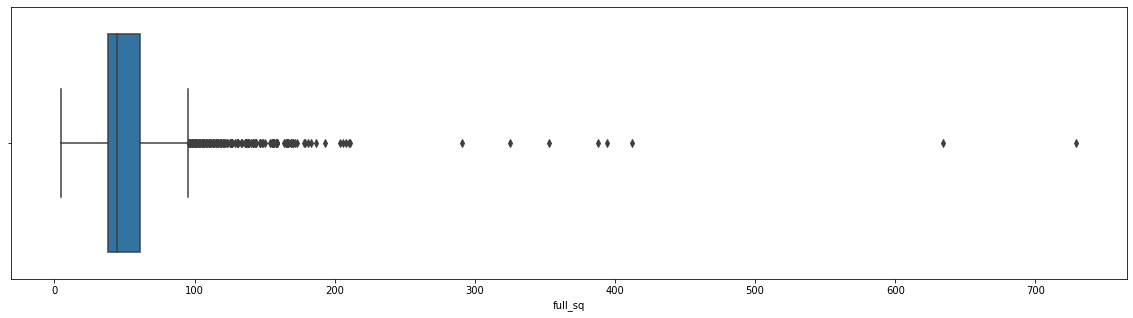

In [17]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["full_sq"])

Судя по этому графику мы можем взять объекты площадью менее 250 кв.м.

In [18]:
train = train[train['full_sq'] < 250]
train.shape

(6898, 13)

Самая большая площадь объекта недвижимости составляет 211 кв.м., самая маленькая - 5 кв.м.
Средняя площадь объекта недвижимости составляет 52 кв.м., медианная - 45 кв.м.


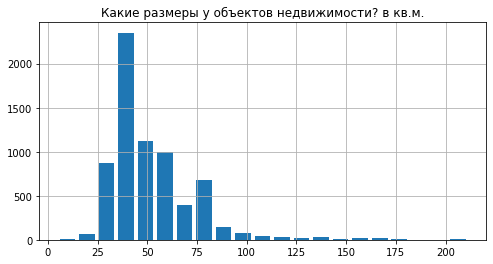

In [19]:
print('Самая большая площадь объекта недвижимости составляет {:,.0f} кв.м., самая маленькая - {:,.0f} кв.м.'.format(
    train.full_sq.max(), train.full_sq.min()))
print('Средняя площадь объекта недвижимости составляет {:,.0f} кв.м., медианная - {:,.0f} кв.м.'.format(
    train.full_sq.mean(), train.full_sq.median()))

train.full_sq.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Какие размеры у объектов недвижимости? в кв.м.')
plt.show()

После корректировки данных с учетом большой площади, посмотрим на изменившееся распределение по цене:

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 111,111,112 рублей
Средняя цена за объект недвижимости составляла 6,332,047 рублей, медианная цена - 5,650,000 рублей


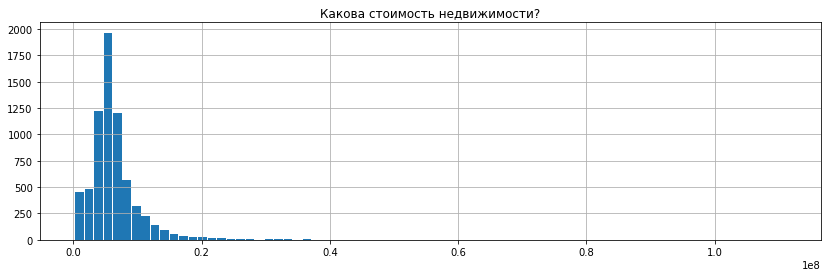

In [20]:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

<AxesSubplot:xlabel='price_doc'>

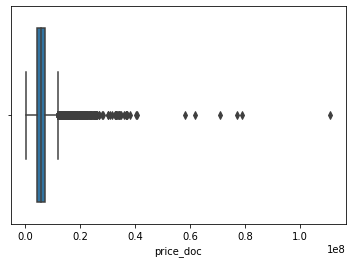

In [21]:
sns.boxplot(x=train["price_doc"])

Исходя из этого графика возьмём объекты стоимостью менее 50 млн.рублей.

In [22]:
train = train[train['price_doc'] < 50000000]
train.shape
# всего на 9 квартир меньше, а данные будут более показательные

(6891, 13)

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 40,500,000 рублей
Средняя цена за объект недвижимости составляла 6,271,083 рублей, медианная цена - 5,650,000 рублей


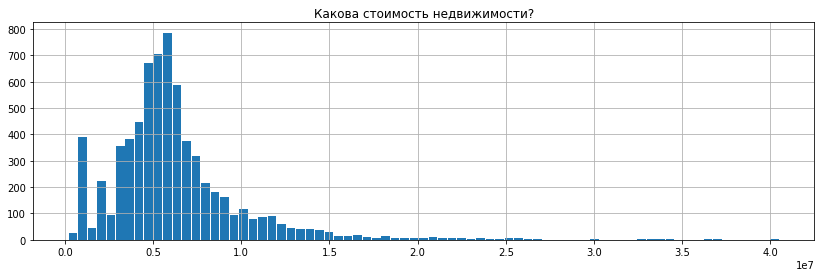

In [23]:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

Посмотрим на распределение всех количественных фичей.

In [24]:
num_features = train.select_dtypes(include=['int64','float64']).columns # у нас удалится столбец с районом
num_features = list(num_features.drop(['id','price_doc'])) # убираем столбец id и целевой столбец
num_features

['full_sq',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'children_school',
 'metro_min_avto',
 'metro_min_walk',
 'public_transport_station_min_walk',
 'detention_facility_km',
 'cafe_count_500']

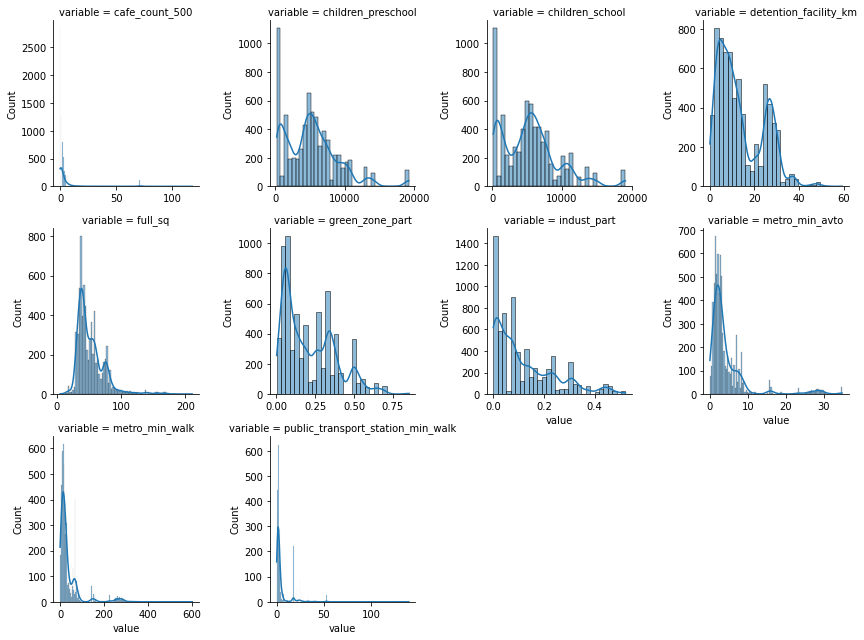

In [25]:
f = pd.melt(train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value', kde=True)

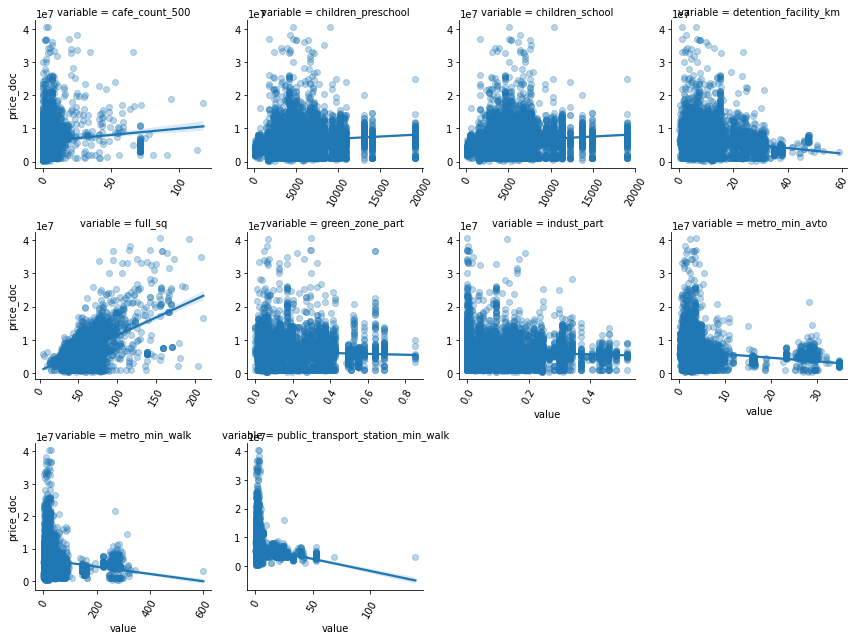

In [26]:
# Scatter plots of numerical features against SalePrice
f = pd.melt(train, id_vars=['price_doc'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'price_doc', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Зависимость, в первую очередь, наблюдается между ценой и размером жилплощади, что закономерно и предсказуемо. Как ни странно, между объемом зеленой зоны в районе и ценой не наблюдается корреляции, а также обратной корреляции не наблюдается в соотношении цены и объема индустриальной зоны. Как и ожидалось, существует обратная корреляция между временем до метро/до остановки общественного транспорта и ценой.

Посмотрим на параметр p-value по каждому параметру по отношению к цене:

In [27]:
train[train.columns[1:]].corr()['price_doc'][:].sort_values(ascending=False).to_frame()

,price_doc
price_doc,1.000000
full_sq,0.589025
children_school,0.134951
children_preschool,0.126158
cafe_count_500,0.102067
green_zone_part,-0.055545
indust_part,-0.070827
public_transport_station_min_walk,-0.150689
metro_min_walk,-0.150777
metro_min_avto,-0.155618


In [ ]:
# Interpreting the value of p
# 0.9 to 1 positive or negative indicates a very strong correlation.
# 0.7 to 0.9 positive or negative indicates a strong correlation.
# 0.5 to 0.7 positive or negative indicates a moderate correlation.
# 0.3 to 0.5 positive or negative indicates a weak correlation.
# 0 to 0.3 positive or negative indicates a negligible correlation.

Отсюда мы делаем вывод, что статистически значимым является только параметр метража. Остальные параметры не оказывают решающего влияния на цену.  
Однако коэффициент Пирсона не очень сюда подходит, тк распределение параметров не симметрично.  

Попробуем ещё посчитать корреляцию по Кендаллу и Спирману.

In [29]:
train[train.columns[1:]].corr(method='kendall')['price_doc'][:].sort_values(ascending=False).to_frame()

,price_doc
price_doc,1.000000
full_sq,0.313061
cafe_count_500,0.198825
children_school,0.156683
children_preschool,0.154908
indust_part,-0.027552
green_zone_part,-0.051249
public_transport_station_min_walk,-0.116593
metro_min_avto,-0.166384
metro_min_walk,-0.172351


In [ ]:
# Kendall's tau-B values:
# Less than + or - 0.10: very weak
# + or -0.10 to 0.19: weak
# + or - 0.20 to 0.29: moderate
# + or - 0.30 or above: strong

Данный анализ подтверждает значимость параметра площади и незначимость остальных параметров.

In [30]:
train[train.columns[1:]].corr(method='spearman')['price_doc'][:].sort_values(ascending=False).to_frame()

,price_doc
price_doc,1.000000
full_sq,0.434495
cafe_count_500,0.269619
children_school,0.234228
children_preschool,0.231104
indust_part,-0.041958
green_zone_part,-0.074631
public_transport_station_min_walk,-0.172880
metro_min_avto,-0.244491
metro_min_walk,-0.254983


In [ ]:
#  .00-.19 “very weak”
#  .20-.39 “weak”
#  .40-.59 “moderate”
#  .60-.79 “strong”
#  .80-1.0 “very strong”

Корреляция Спирмана даёт нам представление о том, что параметр площади играет ключевую роль, но также оказывать влияние могут такие параметры как количество кафе, дошкольных и школьных учреждений, путь до метро и до следственного изолятора). С другой стороны, утверждается, что для одних и тех же значений переменных значения коэффициента корреляции r-Спирмена будет всегда немного больше, чем значения коэффициента ранговой корреляции tau-Кендалла, тогда как уровень значимости будет одинаков. Поэтому скорее всего интерпретация значений коэффициентов имеет определенную вилку, и с уверенностью можно сказать только то, что на цену влияет площадь.

Посмотрим на корреляцию параметров между собой:

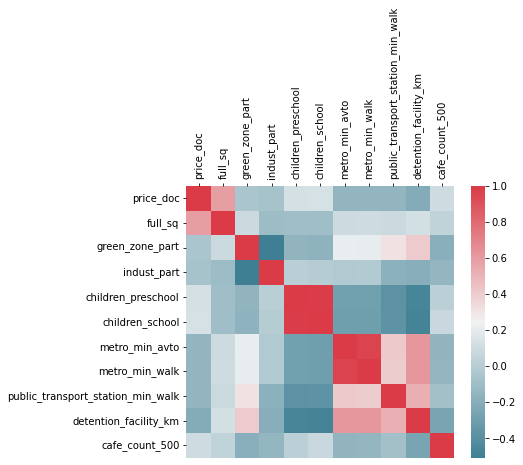

In [28]:
corr = train[['price_doc'] + num_features].corr()
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Мы видим явную зависимость пар параметров количества дошкольных и школьных учреждений, а также времени в пути до метро пешком и на машине, что в целом логично. Это означает, что, например, при построении модели для предсказывания цены объекта недвижимости мы можем выбрать по одному параметру из этих пар.